In [ ]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as plx

# text
import nltk
from nltk.stem import WordNetLemmatizer
!pip install neattext
import neattext.functions as nfx
nltk.download('wordnet')
nltk.download('omw-1.4')
from tqdm import tqdm

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 4.7 MB/s 


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
#data reading

Suicide = pd.read_csv("/content/drive/MyDrive/1125pjt/data/Suicide_Detection.csv")
Suicide.head()


,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [ ]:
# looking at category count
Suicide['class'].value_counts()

suicide        116037
non-suicide    116037
Name: class, dtype: int64

In [ ]:
# spliting data
train_data,test_data=train_test_split(Suicide,test_size=0.2,random_state=10)

In [ ]:
# check how training data is split in terms of category
plx.bar(train_data,x=train_data['class'].value_counts().index.values,
        y=train_data['class'].value_counts(),color=['Suicide','Not Suicide'])

In [ ]:
# text preprocessing (different method from the other model, seems easier)

def clean_text(text):
    text_length=[]
    cleaned_text=[]
    for sent in tqdm(text):
        sent=sent.lower()
        sent=nfx.remove_special_characters(sent)
        sent=nfx.remove_stopwords(sent)
        text_length.append(len(sent.split()))
        cleaned_text.append(sent)
    return cleaned_text ,text_length

In [ ]:
# run preprocessing
cleaned_train_text,train_text_length=clean_text(train_data.text)
cleaned_test_text,test_text_length=clean_text(test_data.text)

100%|██████████| 46415/46415 [00:04<00:00, 10294.36it/s]


In [ ]:
#TF-IDF

vectoriser = TfidfVectorizer(ngram_range=(1,3), max_features=500000) #max feature is arbitary as of now

vectoriser.fit(cleaned_train_text)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



No. of feature_words:  500000


In [ ]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
  
X_bow_train = vectorizer.fit_transform(cleaned_train_text)
X_bow_test = vectorizer.transform(cleaned_test_text)

In [ ]:
cleaned_train_text = vectoriser.transform(cleaned_train_text)
cleaned_test_text  = vectoriser.transform(cleaned_test_text)

In [ ]:
##suicidal WC

d = {'text': cleaned_train_text, 'category': train_data['class']}

df = pd.DataFrame(data=d)
#df.head()

neg = df[df["category"] == 'suicide']
text = list(neg['text'])
data_neg = text
##data_neg
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

TypeError: ignored

<Figure size 1440x1440 with 0 Axes>

In [ ]:
#function to easily evaluate and visualize

def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(cleaned_test_text)

    # Print the evaluation metrics for the dataset.
    print(classification_report(test_data['class'], y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(test_data['class'], y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
#bow model

def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_bow_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(test_data['class'], y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(test_data['class'], y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

Test accuracy score : 0.7867068835505763
              precision    recall  f1-score   support

 non-suicide       0.73      0.92      0.81     23209
     suicide       0.89      0.65      0.75     23206

    accuracy                           0.79     46415
   macro avg       0.81      0.79      0.78     46415
weighted avg       0.81      0.79      0.78     46415



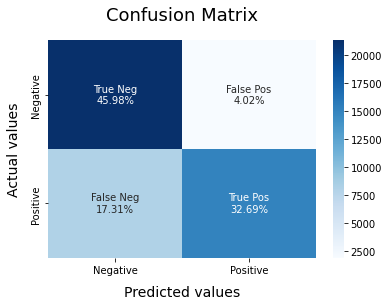

In [ ]:
#bow model

BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_bow_train,train_data['class'])
y_pred = BNBmodel.predict(X_bow_test)
print('Test accuracy score :',accuracy_score(test_data['class'],y_pred))
model_Evaluate(BNBmodel)

Test accuracy score : 0.7938166540988905
              precision    recall  f1-score   support

 non-suicide       0.73      0.94      0.82     23209
     suicide       0.92      0.65      0.76     23206

    accuracy                           0.79     46415
   macro avg       0.82      0.79      0.79     46415
weighted avg       0.82      0.79      0.79     46415



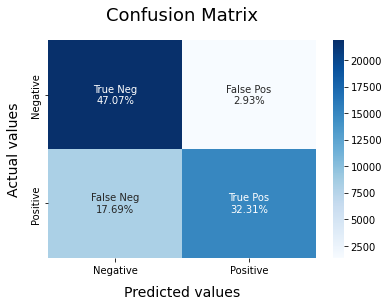

In [ ]:


BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(cleaned_train_text,train_data['class'])
y_pred = BNBmodel.predict(cleaned_test_text)
print('Test accuracy score :',accuracy_score(test_data['class'],y_pred))
model_Evaluate(BNBmodel)

In [ ]:
# file saving

file = open('vectoriser-ngram12-suicide.pickle','wb')
pickle.dump(vectoriser, file)
file.close()

file = open('Suicide-BNB.pickle','wb')
pickle.dump(BNBmodel, file)
file.close()

In [ ]:
# clean text for testing (without length)
def clean_text1(text):
    text_length=[]
    cleaned_text=[]
    for sent in tqdm(text):
        sent=sent.lower()
        sent=nfx.remove_special_characters(sent)
        sent=nfx.remove_stopwords(sent)
#         sent=nfx.remove_shortwords(sent)
        text_length.append(len(sent.split()))
        cleaned_text.append(sent)
    return cleaned_text

In [ ]:
  # testing
text = ["i’m so fucking depressed i hate it but i can’t get diagnosed so i can’t get meds or anything. and what’s worse is my room is so messy and unkept because i can barely fucking wake up in the morning and make it through the day so my mom yells at my and hates me because i’m so lazy and i can’t clean myself or my room or do well at school or do anything or help around the house because I WANT TO FUCKING KILL MYSELF. and i don’t know what to do. i already had a really bad day at school and her yelling makes everything worse and when she figures out i did bad in my test she’s gonna flip and get so mad. and i’m so stressed i have so much stuff to do and i don’t know what to do. i just wish i could end it all. please. i don’t want to suffer like this anymore. there’s no point in being alive. i can’t do this anymore. fuck this. sorry.",
            "May the Force be with you.", "i have a bad day, dont want to live, want to kill myself, is this suicidal",
            "Mr. Stark, I don't feel so good"]

textdata1 = vectoriser.transform(clean_text1(text))
trial = BNBmodel.predict(textdata1)     
trial

100%|██████████| 4/4 [00:00<00:00, 10584.99it/s]


array(['suicide', 'non-suicide', 'non-suicide', 'non-suicide'],
      dtype='<U11')

In [ ]:
def load_models():
    '''
    Replace '..path/' by the path of the saved models.
    '''
    
    # Load the vectoriser.
    file = open('/content/vectoriser-ngram12-suicide.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('/content/Suicide-BNB.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel

def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata1 = vectoriser.transform(clean_text1(text))
    trial = model.predict(textdata1)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, trial):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','category'])
    #df = df.replace([0,1], ["Negative","Positive"])
    return df

if __name__=="__main__":
    # Loading the models.
    vectoriser, LRmodel = load_models()
    
    # Text to classify should be in a list.
    text = ["I’m so lostHello, my name is Adam (16) and I’v.",
            "May the Force be with you.", "i have a bad day, dont want to live, want to kill myself, is this suicidal",
            "Mr. Stark, I don't feel so good"]
    
    df = predict(vectoriser, LRmodel, text)
    print(df.head())

100%|██████████| 4/4 [00:00<00:00, 21816.93it/s]

                                                text     category
0    I’m so lostHello, my name is Adam (16) and I’v.  non-suicide
1                         May the Force be with you.  non-suicide
2  i have a bad day, dont want to live, want to k...  non-suicide
3                    Mr. Stark, I don't feel so good  non-suicide
